# 📊 k-Nearest Neighbor (k-NN) Graph Tutorial

This notebook demonstrates **step-by-step** how a k-NN graph is constructed.

## What You'll Learn:
1. How to generate sample data points
2. How to find k nearest neighbors for each point
3. How to build the graph incrementally
4. How to visualize the connections
5. How different k values affect the graph structure


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import networkx as nx
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


---
## Step 1: Generate Sample Data Points

Let's create two clusters of points in 2D space (simulating two classes)


In [2]:
# Generate 2 clusters with 10 points each
n_points_per_cluster = 10
n_clusters = 2

# Create clusters
X, labels = make_blobs(
    n_samples=n_points_per_cluster * n_clusters,
    n_features=2,
    centers=[[2, 2], [8, 8]],
    cluster_std=0.8,
    random_state=42
)

print(f"Generated {len(X)} points in 2D space")
print(f"Shape of data: {X.shape}")
print(f"\nFirst 5 points:")
for i in range(5):
    print(f"  Point {i}: ({X[i, 0]:.2f}, {X[i, 1]:.2f}) - Class {labels[i]}")


Generated 20 points in 2D space
Shape of data: (20, 2)

First 5 points:
  Point 0: (1.81, 1.81) - Class 0
  Point 1: (2.40, 1.89) - Class 0
  Point 2: (1.63, 1.63) - Class 0
  Point 3: (7.52, 7.77) - Class 1
  Point 4: (8.17, 6.43) - Class 1


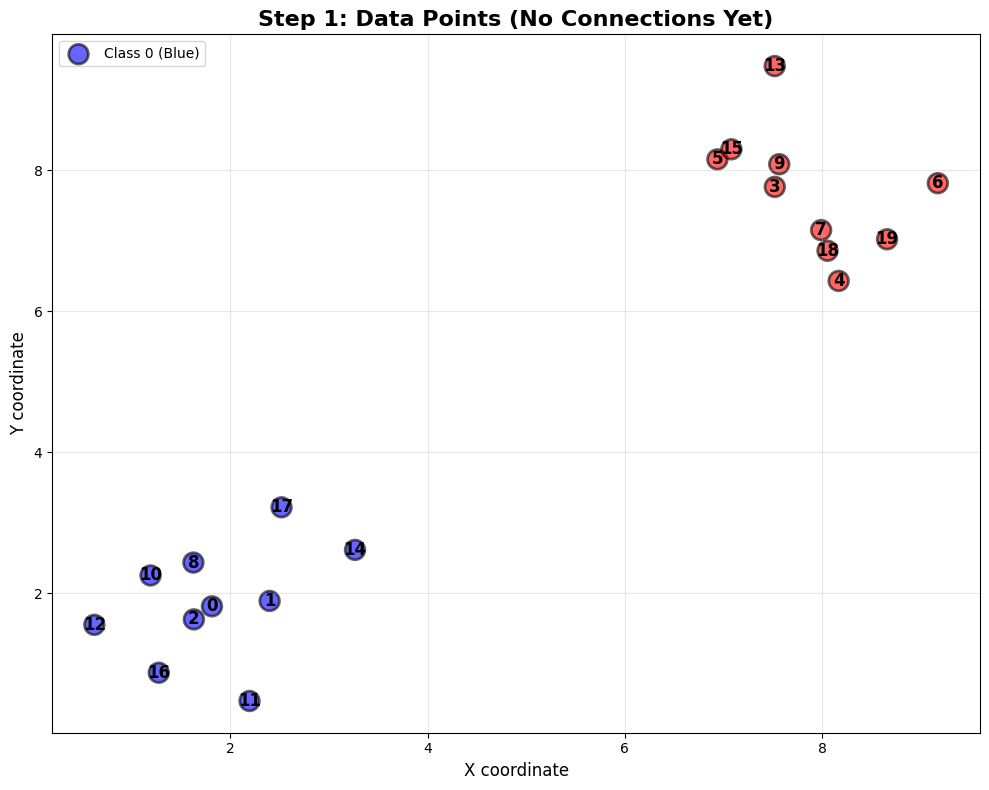


📍 These are our data points before building the k-NN graph


In [3]:
# Visualize the points (no connections yet)
plt.figure(figsize=(10, 8))
colors = ['blue' if label == 0 else 'red' for label in labels]

plt.scatter(X[:, 0], X[:, 1], c=colors, s=200, alpha=0.6, edgecolors='black', linewidth=2)

# Add point labels
for i, (x, y) in enumerate(X):
    plt.annotate(f'{i}', (x, y), fontsize=12, ha='center', va='center', fontweight='bold')

plt.title('Step 1: Data Points (No Connections Yet)', fontsize=16, fontweight='bold')
plt.xlabel('X coordinate', fontsize=12)
plt.ylabel('Y coordinate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'], loc='upper left')
plt.tight_layout()
plt.show()

print("\n📍 These are our data points before building the k-NN graph")


---
## Step 2: Compute Distance Matrix

Calculate the Euclidean distance between every pair of points


Distance matrix shape: (20, 20)

Distance matrix (first 5x5):
[[0.   0.59 0.26 8.25 7.86]
 [0.59 0.   0.81 7.8  7.34]
 [0.26 0.81 0.   8.51 8.11]
 [8.25 7.8  8.51 0.   1.48]
 [7.86 7.34 8.11 1.48 0.  ]]


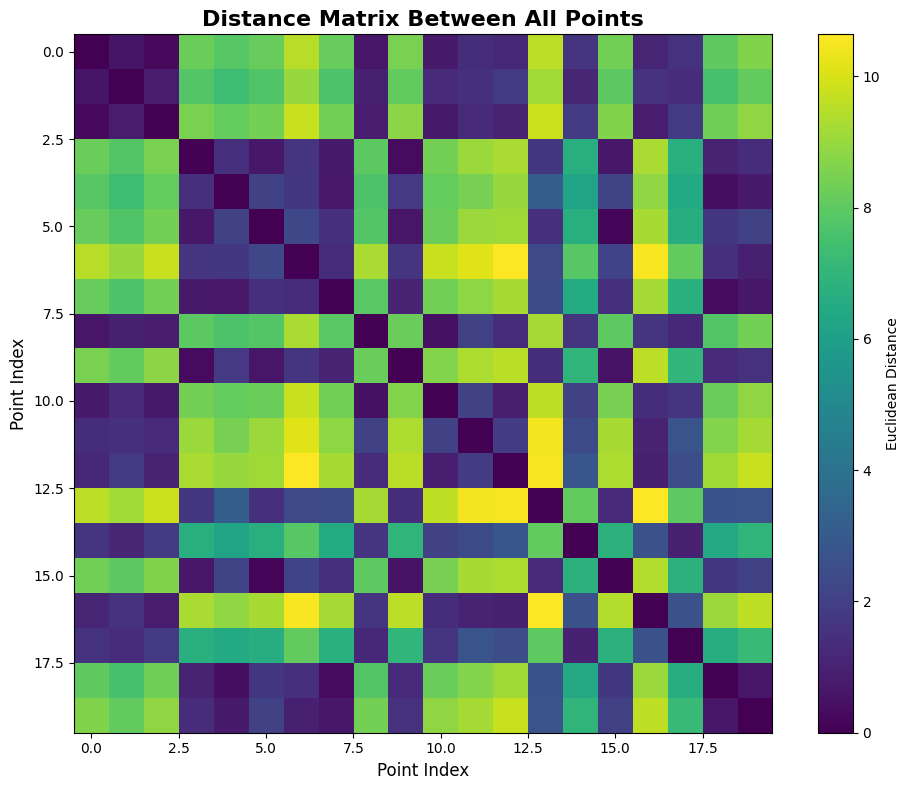


💡 Darker colors = closer points, Lighter colors = farther points


In [9]:
# Compute pairwise distances
dist_matrix = distance_matrix(X, X)

print(f"Distance matrix shape: {dist_matrix.shape}")
print(f"\nDistance matrix (first 5x5):")
print(dist_matrix[:5, :5].round(2))

# Visualize distance matrix as heatmap
plt.figure(figsize=(10, 8))
plt.imshow(dist_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Euclidean Distance')
plt.title('Distance Matrix Between All Points', fontsize=16, fontweight='bold')
plt.xlabel('Point Index', fontsize=12)
plt.ylabel('Point Index', fontsize=12)
plt.tight_layout()
plt.show()

print("\n💡 Darker colors = closer points, Lighter colors = farther points")


---
## Step 3: Find k Nearest Neighbors for Each Point

For each point, identify its k closest neighbors


In [5]:
def find_k_nearest_neighbors(dist_matrix, k):
    """
    Find k nearest neighbors for each point.
    
    Returns:
        neighbors: List of lists, where neighbors[i] contains indices of k nearest neighbors of point i
    """
    n_points = dist_matrix.shape[0]
    neighbors = []
    
    for i in range(n_points):
        # Get distances from point i to all others
        distances = dist_matrix[i, :]
        
        # Sort by distance (excluding the point itself at index i)
        # argsort gives us indices sorted by distance
        sorted_indices = np.argsort(distances)
        
        # Take k+1 closest (because first one is the point itself with distance 0)
        # Then exclude the point itself
        k_nearest = sorted_indices[1:k+1]  # Skip index 0 (the point itself)
        
        neighbors.append(k_nearest.tolist())
    
    return neighbors

# Let's start with k=3
k = 3
neighbors = find_k_nearest_neighbors(dist_matrix, k)

print(f"\n🔍 Finding {k} nearest neighbors for each point:\n")
print("=" * 60)
for i in range(len(neighbors)):
    neighbor_indices = neighbors[i]
    neighbor_distances = [dist_matrix[i, j] for j in neighbor_indices]
    
    print(f"Point {i}: neighbors = {neighbor_indices}")
    print(f"         distances = {[f'{d:.2f}' for d in neighbor_distances]}")
    print()



🔍 Finding 3 nearest neighbors for each point:

Point 0: neighbors = [2, 1, 8]
         distances = ['0.26', '0.59', '0.65']

Point 1: neighbors = [0, 2, 8]
         distances = ['0.59', '0.81', '0.95']

Point 2: neighbors = [0, 10, 8]
         distances = ['0.26', '0.76', '0.81']

Point 3: neighbors = [9, 15, 5]
         distances = ['0.33', '0.69', '0.70']

Point 4: neighbors = [18, 7, 19]
         distances = ['0.44', '0.74', '0.77']

Point 5: neighbors = [15, 9, 3]
         distances = ['0.20', '0.63', '0.70']

Point 6: neighbors = [19, 7, 18]
         distances = ['0.95', '1.36', '1.47']

Point 7: neighbors = [18, 19, 4]
         distances = ['0.30', '0.68', '0.74']

Point 8: neighbors = [10, 0, 2]
         distances = ['0.47', '0.65', '0.81']

Point 9: neighbors = [3, 15, 5]
         distances = ['0.33', '0.53', '0.63']

Point 10: neighbors = [8, 0, 2]
         distances = ['0.47', '0.76', '0.76']

Point 11: neighbors = [16, 2, 0]
         distances = ['1.00', '1.29', '1.40']

Po

---
## Step 4: Build the k-NN Graph Step-by-Step

Let's visualize how the graph is built incrementally, one point at a time


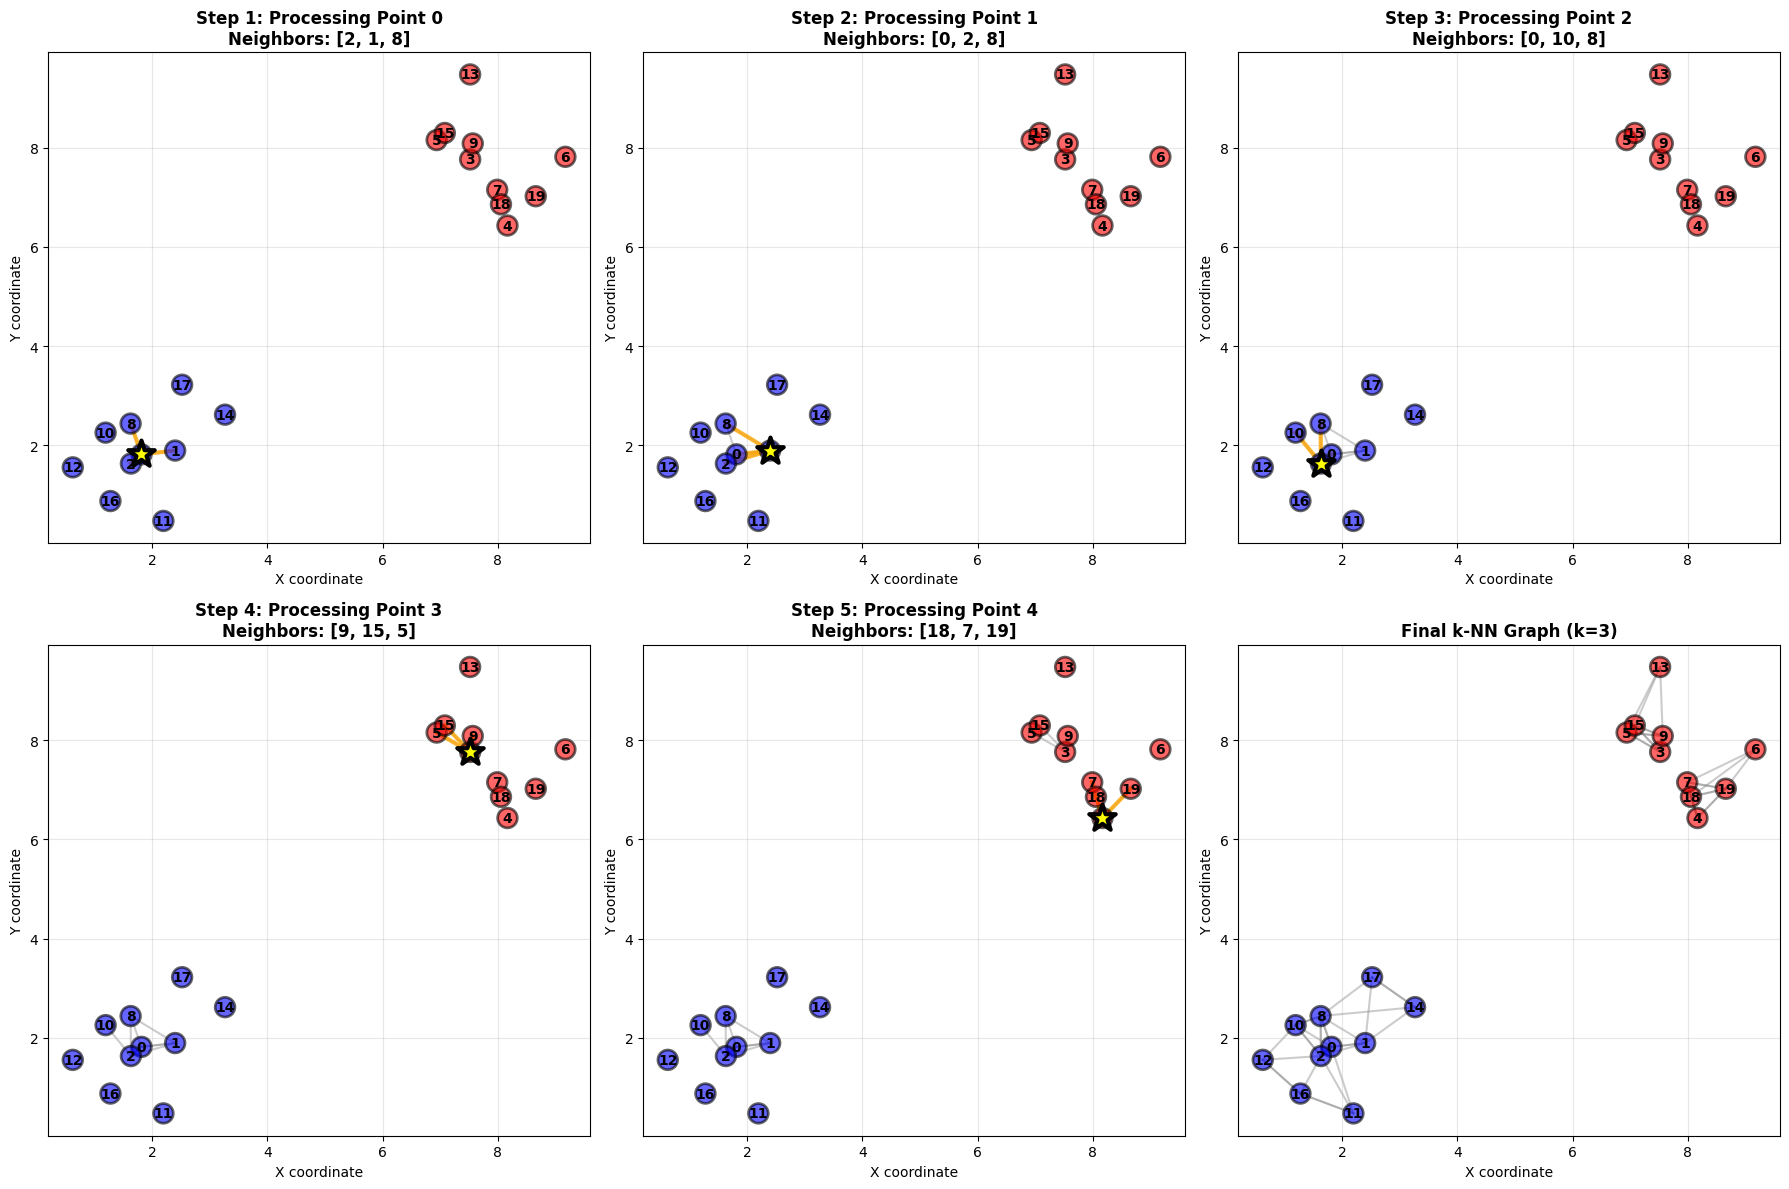


⭐ Yellow star = current point being processed
🟠 Orange lines = new edges being added for that point
⚫ Gray lines = edges already added in previous steps


In [6]:
def visualize_knn_graph_step_by_step(X, labels, neighbors, max_steps=5):
    """
    Visualize the k-NN graph construction step by step.
    Shows how edges are added one point at a time.
    """
    n_points = len(X)
    colors = ['blue' if label == 0 else 'red' for label in labels]
    
    # Limit steps for visualization
    steps_to_show = min(max_steps, n_points)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for step in range(steps_to_show):
        ax = axes[step]
        
        # Plot all points
        ax.scatter(X[:, 0], X[:, 1], c=colors, s=200, alpha=0.6, 
                  edgecolors='black', linewidth=2, zorder=3)
        
        # Add point labels
        for i, (x, y) in enumerate(X):
            ax.annotate(f'{i}', (x, y), fontsize=10, ha='center', 
                       va='center', fontweight='bold', zorder=4)
        
        # Draw edges for points 0 to step
        for i in range(step + 1):
            for j in neighbors[i]:
                # Draw edge from i to j
                ax.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], 
                       'gray', alpha=0.4, linewidth=1.5, zorder=1)
        
        # Highlight current point being processed
        if step < n_points:
            ax.scatter(X[step, 0], X[step, 1], c='yellow', s=400, 
                      edgecolors='black', linewidth=3, zorder=5, marker='*')
            
            # Highlight its neighbors
            for neighbor_idx in neighbors[step]:
                ax.plot([X[step, 0], X[neighbor_idx, 0]], 
                       [X[step, 1], X[neighbor_idx, 1]], 
                       'orange', linewidth=3, zorder=2, alpha=0.8)
        
        ax.set_title(f'Step {step + 1}: Processing Point {step}\nNeighbors: {neighbors[step]}', 
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('X coordinate')
        ax.set_ylabel('Y coordinate')
        ax.grid(True, alpha=0.3)
    
    # Final graph in the last subplot
    ax = axes[-1]
    ax.scatter(X[:, 0], X[:, 1], c=colors, s=200, alpha=0.6, 
              edgecolors='black', linewidth=2, zorder=3)
    
    for i, (x, y) in enumerate(X):
        ax.annotate(f'{i}', (x, y), fontsize=10, ha='center', 
                   va='center', fontweight='bold', zorder=4)
    
    # Draw all edges
    for i in range(n_points):
        for j in neighbors[i]:
            ax.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], 
                   'gray', alpha=0.4, linewidth=1.5, zorder=1)
    
    ax.set_title(f'Final k-NN Graph (k={k})', fontsize=12, fontweight='bold')
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize step-by-step construction
visualize_knn_graph_step_by_step(X, labels, neighbors, max_steps=5)

print("\n⭐ Yellow star = current point being processed")
print("🟠 Orange lines = new edges being added for that point")
print("⚫ Gray lines = edges already added in previous steps")


---
## Step 5: Compare Different Values of k

See how the graph structure changes with different k values


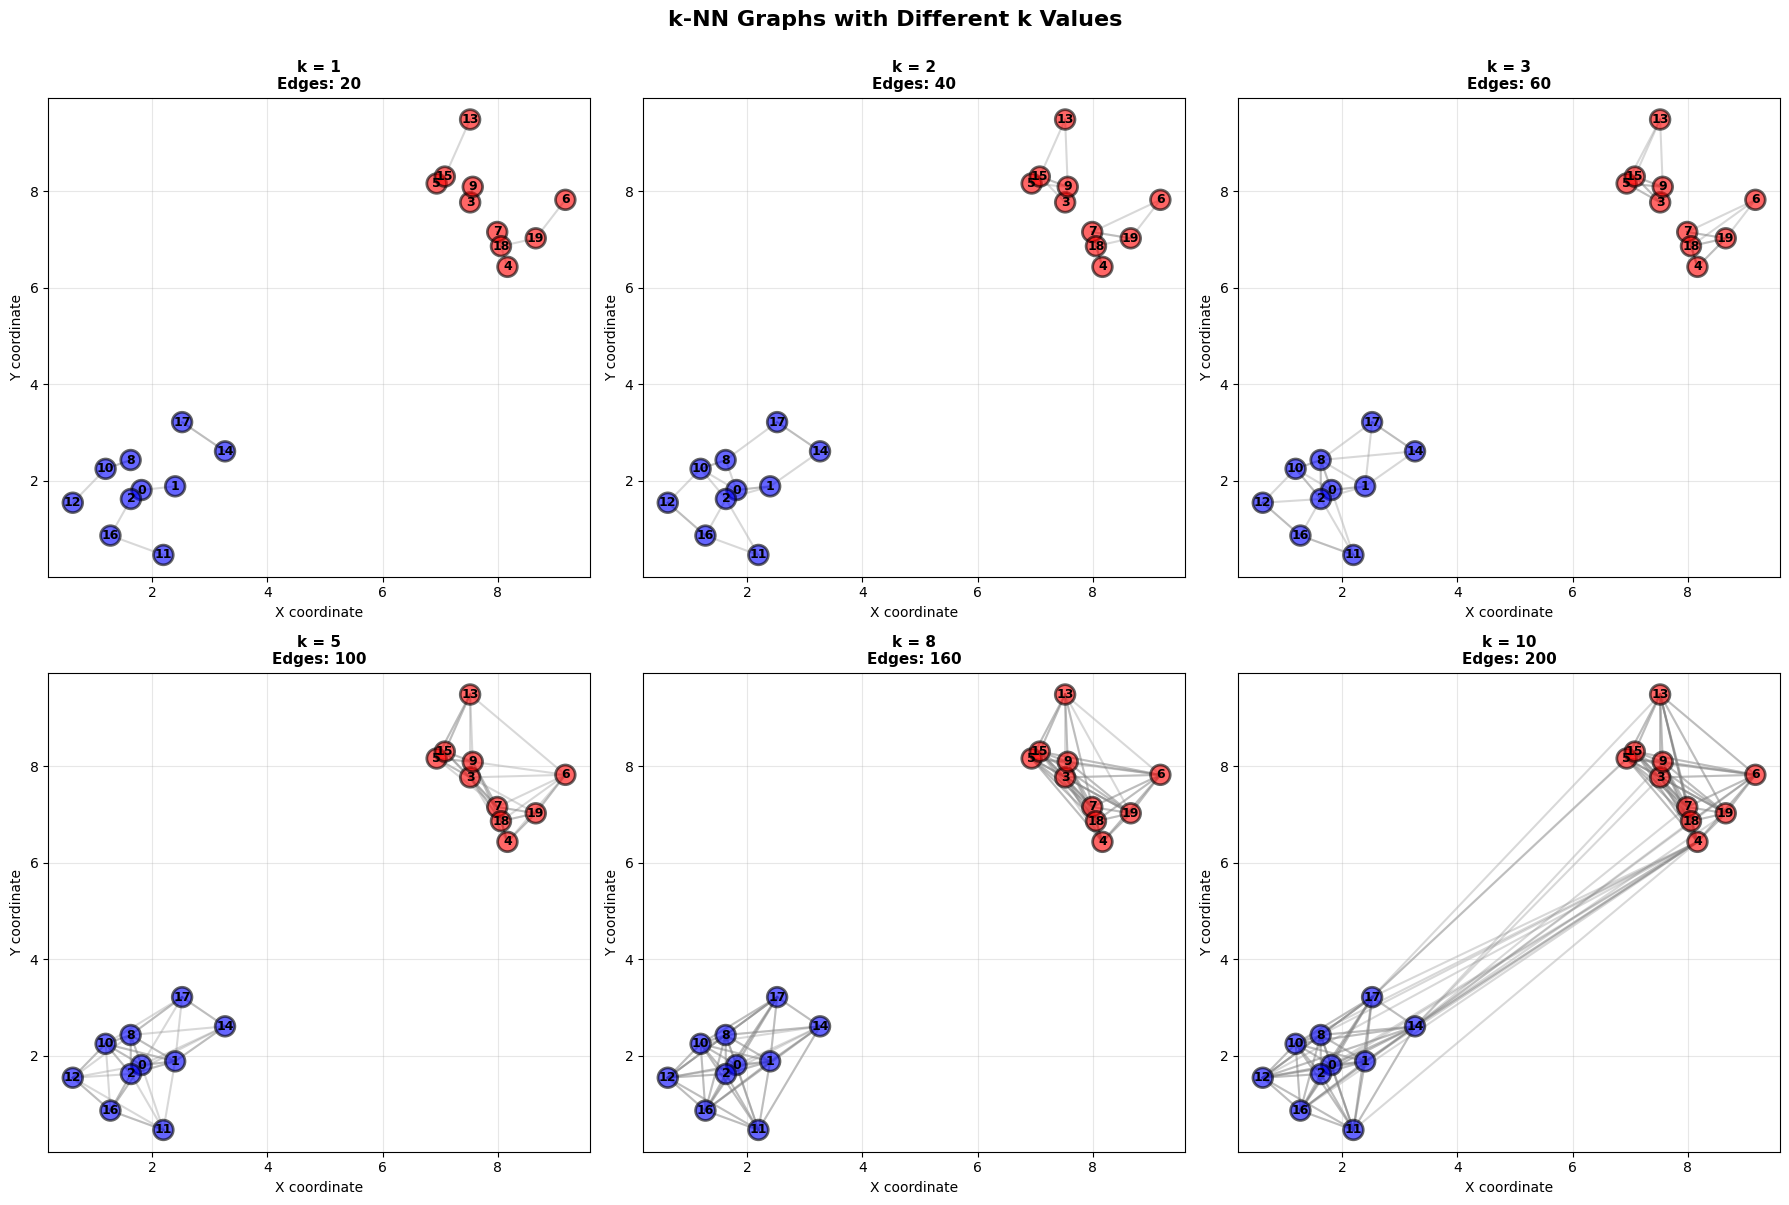


🔍 Observations:
   - Small k (1-2): Sparse graph, might be disconnected
   - Medium k (3-5): Captures local structure well
   - Large k (8-10): Dense graph, might connect distant clusters

💡 The choice of k is critical for manifold approximation!


In [7]:
def visualize_different_k_values(X, labels, k_values):
    """
    Compare k-NN graphs with different k values.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    colors = ['blue' if label == 0 else 'red' for label in labels]
    
    for idx, k in enumerate(k_values):
        ax = axes[idx]
        
        # Find neighbors for this k
        neighbors = find_k_nearest_neighbors(dist_matrix, k)
        
        # Plot points
        ax.scatter(X[:, 0], X[:, 1], c=colors, s=200, alpha=0.6, 
                  edgecolors='black', linewidth=2, zorder=3)
        
        # Add labels
        for i, (x, y) in enumerate(X):
            ax.annotate(f'{i}', (x, y), fontsize=9, ha='center', 
                       va='center', fontweight='bold', zorder=4)
        
        # Draw edges
        edge_count = 0
        for i in range(len(neighbors)):
            for j in neighbors[i]:
                ax.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], 
                       'gray', alpha=0.3, linewidth=1.5, zorder=1)
                edge_count += 1
        
        ax.set_title(f'k = {k}\nEdges: {edge_count}', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('X coordinate')
        ax.set_ylabel('Y coordinate')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('k-NN Graphs with Different k Values', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

# Compare different k values
k_values = [1, 2, 3, 5, 8, 10]
visualize_different_k_values(X, labels, k_values)

print("\n🔍 Observations:")
print("   - Small k (1-2): Sparse graph, might be disconnected")
print("   - Medium k (3-5): Captures local structure well")
print("   - Large k (8-10): Dense graph, might connect distant clusters")
print("\n💡 The choice of k is critical for manifold approximation!")


---
## 🎓 Summary

### What We Learned:

1. **k-NN Graph Construction**: Connect each point to its k nearest neighbors
2. **Graph Properties**: Sparse local structure captures manifold geometry
3. **Parameter k**: Critical choice - too small = disconnected, too large = loses structure
4. **Natural Clustering**: Dense connections within clusters, sparse between clusters

### Connection to Deep Learning:

In the paper "Deep Learning as Ricci Flow":
- Build k-NN graph at **each layer** of the DNN
- Compute geodesic distances and curvature
- Track how these change across layers
- Positive curvature → points converge (same class)
- Negative curvature → points diverge (different classes)

This tutorial showed the **fundamental building block** of their analysis!


📚 What's Inside:
The notebook includes:
Step 1: Generate Sample Data - Creates two clusters of points (simulating two classes)
Step 2: Compute Distance Matrix - Shows the pairwise distances between all points
Step 3: Find k Nearest Neighbors - Demonstrates how to find the k closest neighbors for each point
Step 4: Build Graph Step-by-Step - Visualizes the construction process incrementally, showing how each point connects to its neighbors one at a time (with yellow stars and orange lines!)
Step 5: Compare Different k Values - Shows how the graph structure changes with k = 1, 2, 3, 5, 8, 10
Summary - Connects everything back to the "Deep Learning as Ricci Flow" paper
🎯 Features:
⭐ Visual step-by-step construction showing how edges are added
🎨 Color-coded visualizations (blue/red for classes, yellow stars for current point)
📊 Distance matrix heatmaps
🔢 Detailed neighbor information for each point
📈 Comparison of different k values side-by-side